In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.environ.get('projdir'),'src')
sys.path.append(src_dir)

In [47]:
grd_path = os.path.join(os.environ.get('rawdir'),'gdata','hr_exp','waom10_stable_grd.nc')
grd = xr.open_dataset(grd_path)

In [52]:
width = 5
viscFacMax = 50
diffFacMax = 25

num_i=np.size(grd.lat_rho,0)
num_j=np.size(grd.lat_rho,1)

viscFac=np.ones(np.shape(grd.lat_rho))
diffFac=np.ones(np.shape(grd.lat_rho))
for i in range(width):
    for j in range(i,num_j-i):
        viscFac[i,j]=viscFacMax*(1-i/width)
        viscFac[num_i-1-i,j]=viscFacMax*(1-i/width)
        diffFac[i,j]=diffFacMax*(1-i/width)
        diffFac[num_i-1-i,j]=diffFacMax*(1-i/width)
for j in range(width):
    for i in range(j,num_i-j):
        viscFac[i,j]=viscFacMax*(1-j/width)
        viscFac[i,num_j-1-j]=viscFacMax*(1-j/width)
        diffFac[i,j]=diffFacMax*(1-j/width)
        diffFac[i,num_j-1-j]=diffFacMax*(1-j/width)


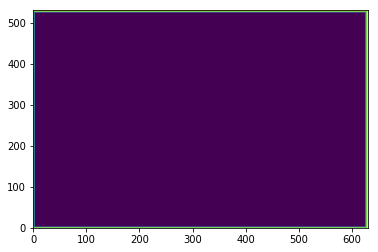

In [53]:
plt.close()
plt.pcolormesh(viscFac)
plt.show()

In [54]:
grd['visc_factor'] = (('eta_rho','xi_rho'),viscFac)
grd['diff_factor'] = (('eta_rho','xi_rho'),diffFac)
grd_path = grd_path = os.path.join(os.environ.get('rawdir'),'gdata','hr_exp','waom10_sponge_grd.nc')
grd.to_netcdf(grd_path)

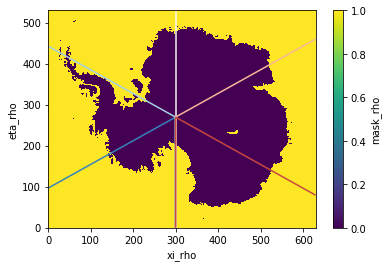

In [16]:
plt.close()
grd.mask_rho.plot()
grd.lon_rho.plot.contour()
plt.show()

In [55]:
grd.visc_factor.values = np.zeros_like(viscFac)
grd.diff_factor.values = np.zeros_like(viscFac)
grd.visc_factor[420:,:50]=np.ones_like(grd.visc_factor[420:,:50])*50
grd.diff_factor[420:,:50]=np.ones_like(grd.visc_factor[420:,:50])*25
grd_path = os.path.join(os.environ.get('rawdir'),'gdata','hr_exp','waom10_spongeDP_grd.nc')
grd.to_netcdf(grd_path)

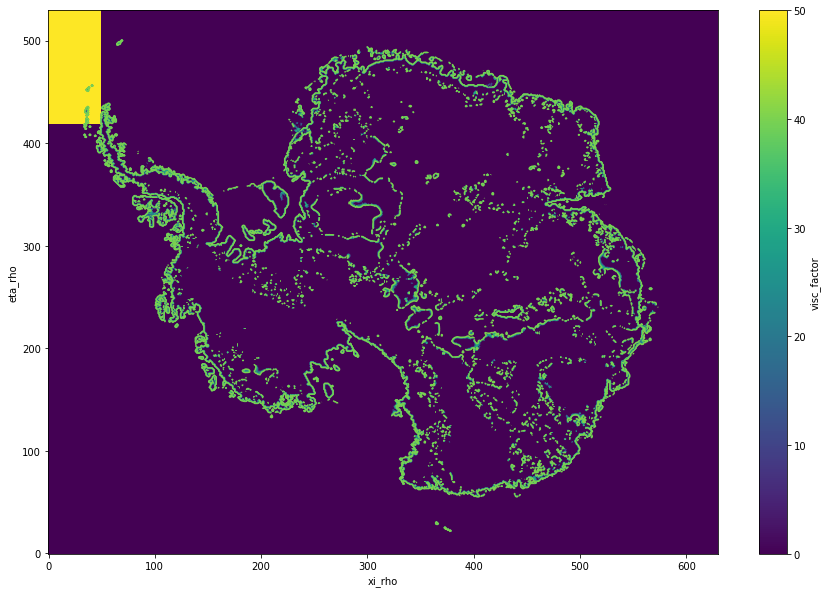

In [56]:
plt.close()
grd.visc_factor.plot(size=10)
grd.mask_rho.plot.contour()
grd.zice.where(grd.zice>-100).plot.contour()
plt.show()

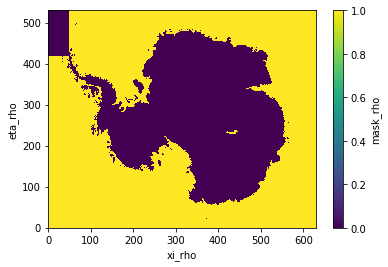

In [45]:
grd.mask_rho[420:,:50]=np.zeros_like(grd.visc_factor[420:,:50])
plt.close()
grd.mask_rho.plot()
plt.show()

In [46]:
from features.mask_roms_uvp import uvp_masks
grd.mask_u.values,grd.mask_v.values,grd.mask_psi.values = uvp_masks(grd.mask_rho.values) 
grd_path = os.path.join(os.environ.get('rawdir'),'gdata','hr_exp','waom10_maskDP_grd.nc')

grd.to_netcdf(grd_path)

In [57]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_h_smooth','ocean_rst.nc')
rst = xr.open_dataset(file_path)

In [63]:
rst.Hbbl

<xarray.DataArray 'Hbbl' (ocean_time: 2, eta_rho: 530, xi_rho: 630)>
[667800 values with dtype=float64]
Coordinates:
    x_rho       (eta_rho, xi_rho) float64 ...
    y_rho       (eta_rho, xi_rho) float64 ...
  * ocean_time  (ocean_time) datetime64[ns] 2011-12-31 2010-12-31
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  depth of oceanic bottom boundary layer
    units:      meter
    time:       ocean_time
    field:      Hbbl, scalar, series

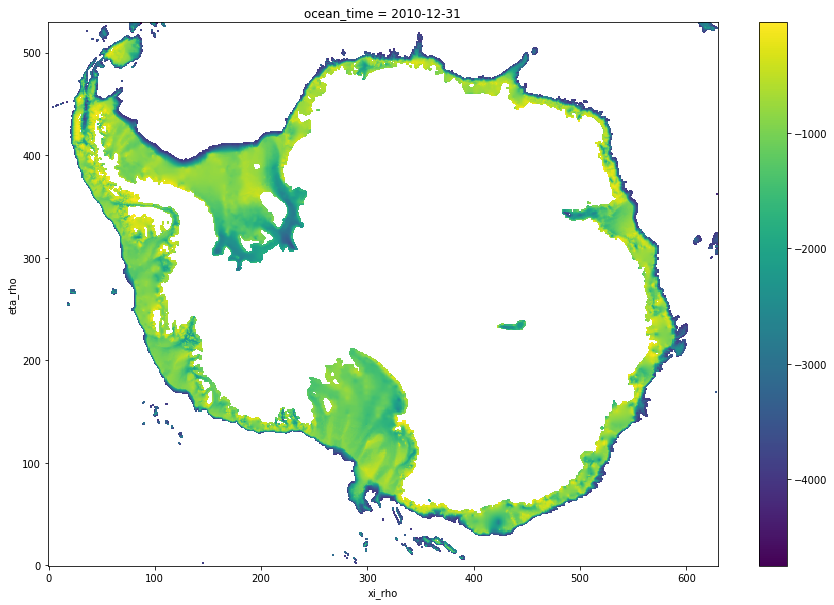

In [68]:
plt.close()
(rst.Hbbl[1]-rst.h).where(rst.h<2000).plot(size=10)
plt.show()